# Identify fake job postings!

Problem statement:

"

My friend is on the job market. However, they keep wasting time applying for fraudulent job postings. They have asked me to use my data skills to filter out fake postings and save them effort.

They have mentioned that job postings are abundant, so they would prefer my solution to risk filtering out real posts if it decreases the number of fraudulent posts they apply to.

I have access to a dataset consisting of approximately 18'000 job postings, containing both real and fake jobs.

"

_The original source of the data can be found [here](https://www.kaggle.com/datasets/whenamancodes/real-or-fake-jobs).

# Dataset

## About Dataset
[Real or Fake] : Fake Job Description Prediction

This dataset contains 18K job descriptions out of which about 800 are fake. 
The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

## Data Dictionary

| Column                | Description 
| ---                   | --- 
| job_id                | Unique Job ID
| title                 | The title of the job ad entry
| location              | Geographical location of the job ad
| department            | Corporate department (e.g. sales)
| salary_range			| Indicative salary range (e.g. $50,000-$60,000)
| company_profile		| A brief company description
| description			| The details description of the job ad
| requirements			| Enlisted requirements for the job opening
| benefits				| Enlisted offered benefits by the employer
| telecommuting			| True for telecommuting positions
| hascompanylogo		| True if company logo is present
| has_questions			| True if screening questions are present
| employment_type		| Full-type, Part-time, Contract, etc
| required_experience	| Executive, Entry level, Intern, etc
| required_education	| Doctorate, Master’s Degree, Bachelor, etc
| industry				| Automotive, IT, Health care, Real estate, etc
| function				| Consulting, Engineering, Research, Sales etc
| fraudulent			| target - Classification attribute

## The imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(font_scale=1.2)

## Read the csv

In [2]:


df = pd.read_csv("https://dagshub.com/tiagopatriciosantos/Fake_job_postings/raw/51bac15202bb796d2e948cc9a3a8d20f7f958d40/data/fake_job_postings.csv")
print("(Rows, columns) :", df.shape)
df.head()

(Rows, columns) : (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# EDA 

Exploratory data analysis.

## Data validation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

## Columns

We will ignore job id

In [5]:
TEXT_COLS = ["title","company_profile","description", "requirements", "benefits"]
NUM_COLS = ["telecommuting", "has_company_logo", "has_questions"]
CAT_COLS = ["location","salary_range", "employment_type" , "required_experience","required_education", "function","industry"]
TARGET_COL = ["fraudulent"]


### Filter Columns

**Filter selected columns**, ignore some columns with too much missing data ['department','salary_range','benefits' ], also ignore job_id:

In [6]:
def filter_columns(df):
    COLUMNS= TEXT_COLS + NUM_COLS + CAT_COLS + TARGET_COL
    return df[COLUMNS]

df = filter_columns(df)
df.columns


Index(['title', 'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'location',
       'salary_range', 'employment_type', 'required_experience',
       'required_education', 'function', 'industry', 'fraudulent'],
      dtype='object')

Counting **missing data** and the proportion in each column:

In [7]:
df[df["fraudulent"]==1].isnull().sum()

title                    0
company_profile        587
description              1
requirements           154
benefits               364
telecommuting            0
has_company_logo         0
has_questions            0
location                19
salary_range           643
employment_type        241
required_experience    435
required_education     451
function               337
industry               275
fraudulent               0
dtype: int64

In [8]:
df.isnull().agg(["sum", "mean"]).T

,sum,mean
title,0.0,0.000000
company_profile,3308.0,0.185011
description,1.0,0.000056
requirements,2695.0,0.150727
benefits,7210.0,0.403244
telecommuting,0.0,0.000000
has_company_logo,0.0,0.000000
has_questions,0.0,0.000000
location,346.0,0.019351
salary_range,15012.0,0.839597


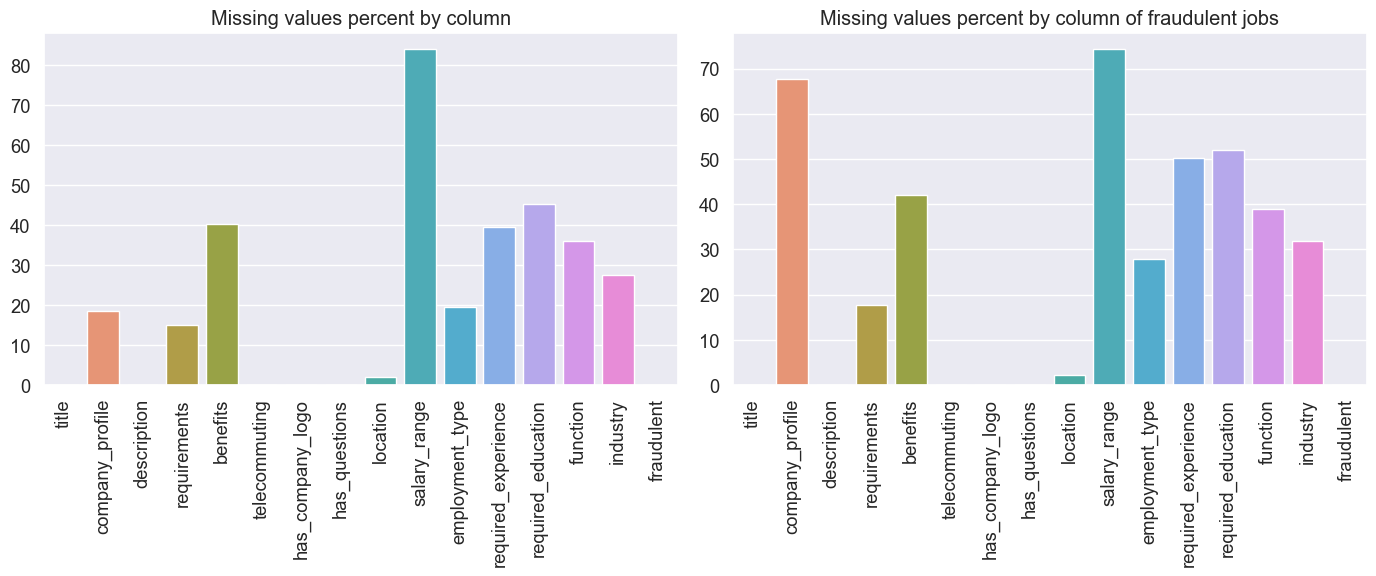

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(14,6))
ax= sns.barplot(x=df.columns, y=df.isnull().sum()/df.shape[0]*100, ax=ax0 )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Missing values percent by column")

ax= sns.barplot(x=df.columns, y=df[df["fraudulent"]==1].isnull().sum()/df[df["fraudulent"]==1].shape[0]*100, ax=ax1 )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Missing values percent by column of fraudulent jobs");

plt.tight_layout()

Capturing the notion of **one observation**:

In [10]:
dict(df.iloc[0])

{'title': 'Marketing Intern',
 'company_profile': "We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.",
 'description': 'Food52, a fast-growing, James Beard Award-wi

## Target: `fraudulent`

Total: 17880
Non Fraudulent: 17014
Fraudulent: 866
Fraudulent percent: 4.84 %


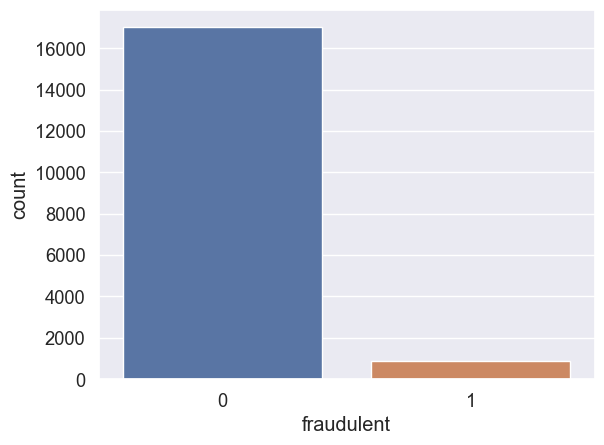

In [11]:
print("Total:",df.shape[0])
print("Non Fraudulent:", (-df["fraudulent"]+1).sum())
print("Fraudulent:", df["fraudulent"].sum())
print("Fraudulent percent:", np.round(df["fraudulent"].mean()*100,2), "%")
sns.countplot(data=df, x="fraudulent");